In [303]:
print("hello")

hello


In [304]:
%pip install --quiet --upgrade langchain langchain-community langchain-chroma

Note: you may need to restart the kernel to use updated packages.


In [305]:
pip install -qU langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [306]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = ""

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

In [307]:
import getpass

os.environ["OPENAI_API_KEY"] = ""

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [308]:
%pip install bs4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [309]:
import bs4
from langchain import hub
from langchain_chroma import Chroma
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Load, chunk and index the contents of the blog.
loader = WebBaseLoader(
    web_paths=("https://redhardnheavy.com/queen-70s-vs-80s-evolucion-o-adaptarse-al-mercado/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

# Retrieve and generate using the relevant snippets of the blog.
retriever = vectorstore.as_retriever()
prompt = hub.pull("rlm/rag-prompt")


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

rag_chain.invoke("Freddie Mercury quien era?")

/Users/belxyrojas/Library/Python/3.9/lib/python/site-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


'Freddie Mercury fue un destacado cantante, pianista y líder de la banda de rock Queen, conocida por su creatividad y talento musical. Su carrera abarcó desde 1973 hasta su muerte en 1991, durante la cual produjo álbumes icónicos como "Bohemian Rhapsody" e "Innuendo". Mercury es recordado como una de las figuras más influyentes en la historia del rock.'

In [310]:
# cleanup
vectorstore.delete_collection()

In [311]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))
loader = WebBaseLoader(
    web_paths=("https://redhardnheavy.com/queen-70s-vs-80s-evolucion-o-adaptarse-al-mercado/",),
    bs_kwargs={"parse_only": bs4_strainer},
)
docs = loader.load()

len(docs[0].page_content)

9539

In [312]:
print(docs[0].page_content[:500])


QUEEN: 70s vs 80s – ¿Evolución o adaptarse al mercado? 
Jun 06, 2018 por Red Hard´n´Heavy en Especiales  


Aprovechando el concierto que se nos avecina el sábado en el Wizink Center madrileño con la mítica banda británica, compuesta por su guitarrista Brian May y su batería Roger Taylor, acompañados del gran frontman Adam Lambert, vamos a aprovechar para echar una mirada hacia atrás y hacer una pequeña reflexión sobre la carrera de La Reina.


Oficialmente la carrera de la banda inglesa capita


In [313]:
print(docs[0].page_content[:500])


QUEEN: 70s vs 80s – ¿Evolución o adaptarse al mercado? 
Jun 06, 2018 por Red Hard´n´Heavy en Especiales  


Aprovechando el concierto que se nos avecina el sábado en el Wizink Center madrileño con la mítica banda británica, compuesta por su guitarrista Brian May y su batería Roger Taylor, acompañados del gran frontman Adam Lambert, vamos a aprovechar para echar una mirada hacia atrás y hacer una pequeña reflexión sobre la carrera de La Reina.


Oficialmente la carrera de la banda inglesa capita


In [314]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

len(all_splits)

14

In [315]:
len(all_splits[0].page_content)

446

In [316]:
all_splits[10].metadata

{'source': 'https://redhardnheavy.com/queen-70s-vs-80s-evolucion-o-adaptarse-al-mercado/',
 'start_index': 6392}

In [317]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=all_splits, embedding=OpenAIEmbeddings())

In [318]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 6})

retrieved_docs = retriever.invoke("en que año murio Freddie Mercury  ?")

len(retrieved_docs)

6

In [319]:
print(retrieved_docs[0].page_content)



Oficialmente la carrera de la banda inglesa capitaneada por Freddie Mercury discurre entre los años 1973, debutando con su álbum homónimo (durísimo pero ya tremendamente variado y muy adelantado a su época) hasta 1991 con el grandísimo album “Innuendo”. Después vendría el disco póstumo “Made in heaven” (que finalmente salió en 1995) donde Freddie dejaría su voz grabada antes de su muerte en 1992 para que el resto de la banda lo completara.
Está claro que hay una gran diferencia compositiva y de producción entre los discos de los 70 con canciones icónicas como “Bohemian Rhapsody” o “Somebody to love”, donde sólo empleaban instrumentos y voces reales, dando unas composiciones más de rock clásico, y los discos de los 80 con momentos como “A kind of Magic” o “The miracle” donde daban paso a sintetizadores y producciones mucho más elaboradas.


In [320]:
pip install -qU langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [321]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "filler context", "question": "filler question"}
).to_messages()

example_messages

/Users/belxyrojas/Library/Python/3.9/lib/python/site-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


[HumanMessage(content="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: filler question \nContext: filler context \nAnswer:", additional_kwargs={}, response_metadata={})]

In [322]:
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: filler question 
Context: filler context 
Answer:


In [323]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [324]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}



In [325]:
pip install langgraph


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [326]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

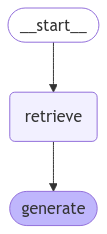

In [327]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [328]:
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)

In [329]:
total_documents = len(all_splits)
third = total_documents // 3

for i, document in enumerate(all_splits):
    if i < third:
        document.metadata["section"] = "beginning"
    elif i < 2 * third:
        document.metadata["section"] = "middle"
    else:
        document.metadata["section"] = "end"


all_splits[0].metadata

{'source': 'https://redhardnheavy.com/queen-70s-vs-80s-evolucion-o-adaptarse-al-mercado/',
 'start_index': 1,
 'section': 'beginning'}

In [330]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)
_ = vector_store.add_documents(all_splits)

In [331]:
from typing import Literal

from typing_extensions import Annotated


class Search(TypedDict):
    """Search query."""

    query: Annotated[str, ..., "Search query to run."]
    section: Annotated[
        Literal["beginning", "middle", "end"],
        ...,
        "Section to query.",
    ]

In [332]:
class State(TypedDict):
    question: str
    query: Search
    context: List[Document]
    answer: str


def analyze_query(state: State):
    structured_llm = llm.with_structured_output(Search)
    query = structured_llm.invoke(state["question"])
    return {"query": query}


def retrieve(state: State):
    query = state["query"]
    retrieved_docs = vector_store.similarity_search(
        query["query"],
        filter=lambda doc: doc.metadata.get("section") == query["section"],
    )
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


graph_builder = StateGraph(State).add_sequence([analyze_query, retrieve, generate])
graph_builder.add_edge(START, "analyze_query")
graph = graph_builder.compile()

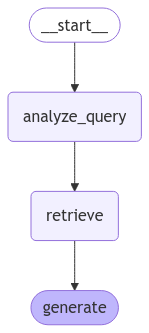

In [333]:
display(Image(graph.get_graph().draw_mermaid_png()))



In [334]:
for step in graph.stream(
    {"question": "habla de Mercury ?"},
    stream_mode="updates",
):
    print(f"{step}\n\n----------------\n")

{'analyze_query': {'query': {'query': 'Mercury', 'section': 'beginning'}}}

----------------

{'retrieve': {'context': [Document(id='d86479f3-e681-453a-8e34-1bdfef5fc015', metadata={'source': 'https://redhardnheavy.com/queen-70s-vs-80s-evolucion-o-adaptarse-al-mercado/', 'start_index': 1835, 'section': 'beginning'}, page_content='Del estudiante de arte con mil ideas en la cabeza y una creatividad desbordante, además de un cantante, pianista y frontman superior, toda una estrella del rock incluso antes de que existiera hasta el concepto del mismo, unido al talento superior de otro estudiante de arte como era Brian May (actualmente astrofísico, que seguramente “algo” tuviera que ver en la magia y expansión mental y sonora de la que siempre hicieron gala QUEEN). La base rítmica más “sencilla”, más roquera, más de vieja escuela con unos Roger Taylor y John Deacon centrados en apuntalar las bases para que May y Mercury volaran.'), Document(id='da4086c7-b072-413b-838c-711b27ab5e66', metadata

In [335]:
%pip install -qU langchain-pinecone pinecone-notebooks

Note: you may need to restart the kernel to use updated packages.


In [336]:
import getpass
import os
import time

from pinecone import Pinecone, ServerlessSpec

if not os.getenv("PINECONE_API_KEY"):
    os.environ["PINECONE_API_KEY"] = ""

pinecone_api_key = os.environ.get("PINECONE_API_KEY")

pc = Pinecone(api_key=pinecone_api_key)

/Users/belxyrojas/Library/Python/3.9/lib/python/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [337]:
import time

index_name = "langchain-test-index"  # change if desired

existing_indexes = [index_info["name"] for index_info in pc.list_indexes()]

if index_name not in existing_indexes:
    pc.create_index(
        name=index_name,
        dimension=3072,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )
    while not pc.describe_index(index_name).status["ready"]:
        time.sleep(1)

index = pc.Index(index_name)

In [340]:
from langchain_pinecone import PineconeVectorStore

vector_store = PineconeVectorStore(index=index, embedding=embeddings)

In [341]:
from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="El álbum de 1977 de la banda, News of the World, contenía «We Will Rock You» y «We Are the Champions», que se han convertido en himnos en los eventos deportivos. A principios de la década de 1980, Queen era una de las bandas de arena rock más importantes del mundo. «Another One Bites the Dust» de The Game (1980) se convirtió en su sencillo más vendido, mientras que su álbum recopilatorio de 1981 Greatest Hits es uno de los álbumes más vendidos a nivel mundial con más de 50 millones de copias. En el Reino Unido es el álbum más vendido con más de 7 millones de copias y está certificado como nueve veces platino en los EE. UU..",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="Los miembros fundadores de Queen se reunieron en el oeste de Londres a fines de la década de 1960. El guitarrista Brian May había construido su propia guitarra con su padre en 1963 y formó el grupo 1984 —llamado así por la novela de Orwell— al año siguiente con el cantante Tim Staffell.1​ May dejó el grupo a principios de 1968 para concentrarse en su licenciatura en Física y Astronomía Infrarroja en el Imperial College y encontrar un grupo que pudiera escribir material original.2​ Formó el grupo Smile con Staffell —ahora toca el bajo— y el teclista Chris Smith.3",
    metadata={"source": "news"},
)

document_3 = Document(
    page_content="El promotor Ken Testi logró atraer el interés de Charisma Records, quienes le ofrecieron a Queen un anticipo de alrededor de £25 000, pero el grupo lo rechazó al darse cuenta de que el sello promocionaría a Genesis",
    metadata={"source": "tweet"},
)



documents = [
    document_1,
    document_2,
    document_3,

]
uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)

['1864187c-4082-4c15-a65f-3be7b3fe9cb5',
 'd3363d85-62bd-4f0b-9ff1-b74eb419d578',
 'e33e4977-8c3b-459d-92e7-cc23c6e3e29f']

In [342]:
results = vector_store.similarity_search(
    "Que es  The Game (1980)",
    k=2,
    filter={"source": "tweet"},
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

* El álbum de 1977 de la banda, News of the World, contenía «We Will Rock You» y «We Are the Champions», que se han convertido en himnos en los eventos deportivos. A principios de la década de 1980, Queen era una de las bandas de arena rock más importantes del mundo. «Another One Bites the Dust» de The Game (1980) se convirtió en su sencillo más vendido, mientras que su álbum recopilatorio de 1981 Greatest Hits es uno de los álbumes más vendidos a nivel mundial con más de 50 millones de copias. En el Reino Unido es el álbum más vendido con más de 7 millones de copias y está certificado como nueve veces platino en los EE. UU.. [{'source': 'tweet'}]
* El promotor Ken Testi logró atraer el interés de Charisma Records, quienes le ofrecieron a Queen un anticipo de alrededor de £25 000, pero el grupo lo rechazó al darse cuenta de que el sello promocionaría a Genesis [{'source': 'tweet'}]


In [343]:
retriever = vector_store.as_retriever(
    search_type="similarity_score_threshold",
    search_kwargs={"k": 1, "score_threshold": 0.5},
)
retriever.invoke("quienes son los miembros fundadores de Queen", filter={"source": "news"})

[Document(id='d3363d85-62bd-4f0b-9ff1-b74eb419d578', metadata={'source': 'news'}, page_content='Los miembros fundadores de Queen se reunieron en el oeste de Londres a fines de la década de 1960. El guitarrista Brian May había construido su propia guitarra con su padre en 1963 y formó el grupo 1984 —llamado así por la novela de Orwell— al año siguiente con el cantante Tim Staffell.1\u200b May dejó el grupo a principios de 1968 para concentrarse en su licenciatura en Física y Astronomía Infrarroja en el Imperial College y encontrar un grupo que pudiera escribir material original.2\u200b Formó el grupo Smile con Staffell —ahora toca el bajo— y el teclista Chris Smith.3')]